In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 20


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.002598881341 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000987868174 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

# EPot Condition

In [3]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Wa

In [4]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

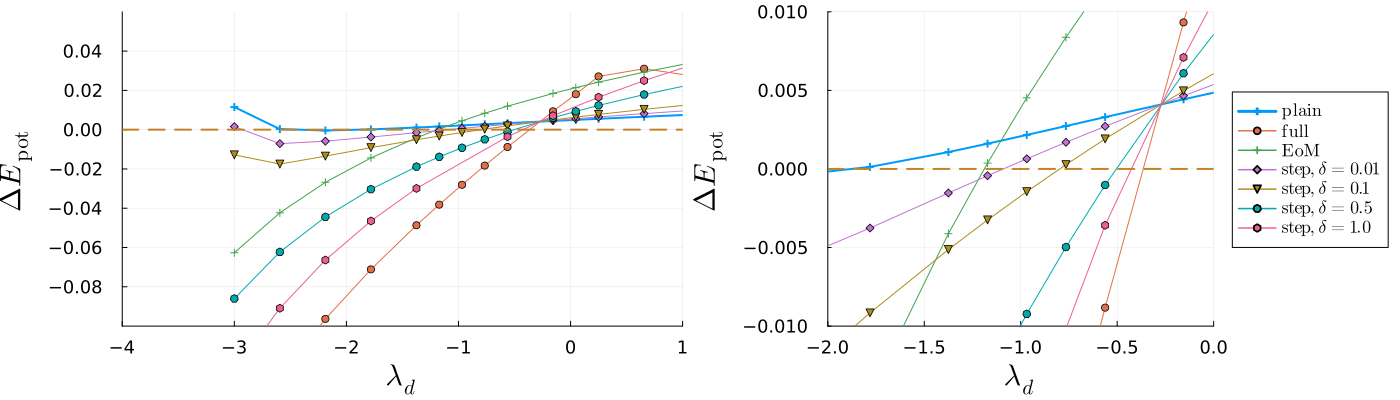

In [18]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.06), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

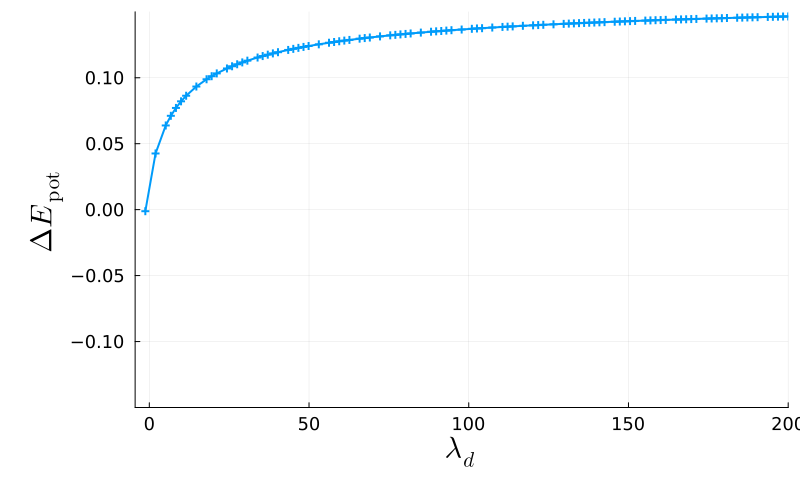

In [6]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 200.0
Nit = 100
xr_dm_full, fr_dm_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);
plot(xr_dm_full, fr_dm_full,size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)

In [35]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular

function newton_right_test(f::Function, start::T, min::T; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=false)::T where T <: Number
    df(x) = ForwardDiff.derivative(f,x) #FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test(f::Function, df::Function, start::T, min::T; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=false)::T where T <: Number
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && break
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end


    function f_c2(λd_i)
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return Epot_1 - Epot_2
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Newton_TF. Result = ", λd)
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end


    function f_c2(λd_i)
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return Epot_1 - Epot_2
    end
    λd  = newton_right_test(f_c2, λd_min+10.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Newton_right. Result = ", λd)
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end


    function f_c2(λd_i)
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return Epot_1 - Epot_2
    end  
    println(f_c2(λd_min + 1e-4), " ::: ", f_c2(200.0))
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd)
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


λdm_correction_val_MethodTest (generic function with 1 method)

In [36]:
@timeit to "newtonReset" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

LoadError: TypeError: in keyword argument λd, expected Float64, got a value of type ForwardDiff.Dual{ForwardDiff.Tag{var"#f_c2#82"{Bool, DataType, Float64, Int64, χT, γT, χT, γT, Array{ComplexF64, 3}, lDΓAHelper, Vector{ComplexF64}, OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, Vector{ComplexF64}, Vector{Float64}}, Float64}, Float64, 1}

In [9]:
@timeit to "newtonSecular" λdm_correction_val_testTF(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

Method: Newton_TF. Result = -1.1893632934196487


(0.033047409083551436, -1.1893632934196487)

In [10]:
@timeit to "newtonTF" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

nsteps = 11
Method: Newton_right. Result = -1.1893634998898501


(0.03304741160154274, -1.1893634998898501)

In [11]:
methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition()),] 
             # ("LithBoonkkampIJzermanBracket", Roots.LithBoonkkampIJzermanBracket()), ("BracketedHalley", Roots.BracketedHalley()), ("BracketedChebyshev", Roots.BracketedChebyshev()), ("BracketedSchroder", Roots.BracketedSchroder())]
for el in methodList
    try
        @timeit to el[1] λdm_correction_val_MethodTest(el[2], χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)
    catch e
        println("method $(el[1]) failed with $e")
    end
end

-2.279055829945435 ::: 0.14648809332349363
Method: Bisection(). Result = -1.1893633937851402
-2.2790558299457775 ::: 0.14648809332349355
Method: A42(). Result = -1.1893634998898928
-2.2790558299601726 ::: 0.14648809332349355
Method: AlefeldPotraShi(). Result = -1.1893634998898943
-2.2790558299460804 ::: 0.1464880933234936
Method: Roots.Brent(). Result = -1.1893634998900104
-2.2790558299601935 ::: 0.14648809332349344
Method: Roots.Chandrapatla(). Result = -1.1893634998651201
-2.2790558299318677 ::: 0.14648809332349355
Method: Roots.Ridders(). Result = -1.1893634998718936
-2.279055829931881 ::: 0.1464880933234934
Method: Roots.ITP{Float64, Int64}(0.2, 2, 1). Result = -1.1893635761783428
-2.279055829937684 ::: 0.14648809332349352
Method: FalsePosition{:anderson_bjork}(). Result = -1.1893634998898874
-2.2790558299318437 ::: 0.14648809332349372
method LithBoonkkampIJzermanBracket failed with MethodError(getindex, (-2.27905582993185, 1:2), 0x0000000000006918)


In [12]:
to

────────────────────────────────────────────────────────────────────────────────
                                       Time                    Allocations      
                              ───────────────────────   ────────────────────────
      Tot / % measured:             469s /   7.7%            367GiB /   7.8%    

Section               ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────────────────
newtonReset                1    4.93s   13.6%   4.93s   3.98GiB   13.9%  3.98GiB
Bisection                  1    4.87s   13.4%   4.87s   3.89GiB   13.6%  3.89GiB
newtonTF                   1    4.74s   13.1%   4.74s   3.96GiB   13.8%  3.96GiB
A42                        1    3.14s    8.6%   3.14s   2.37GiB    8.3%  2.37GiB
AlefeldPotraShi            1    3.12s    8.6%   3.12s   2.46GiB    8.6%  2.46GiB
Ridders                    1    2.84s    7.8%   2.84s   2.22GiB    7.8%  2.22GiB
Brent                      

In [13]:
reset_timer!(to)

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:     39.9μs /   0.0%              712B /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────